In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Following is an easy implementation of Perceptron Learning on examples of AND and NOR Gates

***0 will belong to class y= -1 and 1 will belong to class y=1***

***The first element is 1 in X for the bias term***

In [38]:
X_train_and= np.array([
    (1, 0, 0),
    (1, 0, 1),
    (1, 1, 0),
    (1, 1, 1)
])

y_train_and= np.array([-1, -1, -1, 1])

In [39]:
X_train_nor= np.array([
    (1, 0, 0),
    (1, 0, 1),
    (1, 1, 0),
    (1, 1, 1)
])
y_train_nor= np.array([1, -1, -1, -1])

In [40]:
def get_output(W, X): #For getting output of perceptron for given input and weights
    
    return np.dot(W, X)

In [41]:
def is_missclassified(y, z):
    return y*z < 0 #If this y*z -ve, then miss-classification is caught...
                    #where y --> actual
                            #z --> prediction

In [42]:
def update_rule(W, X, y, lr): #perceptron update rule: w_new <--- w_old + yx
    return W + (lr * (y * X))

In [43]:
def show_learning(w):
    global color_index  # Access the global variable to track the current color for plotting

    # Print the current weights in a formatted way
    print('w0 =', '%5.2f' % w[0], ', w1 =', '%5.2f' % w[1], ', w2 =', '%5.2f' % w[2])

    # Plot initialization (only runs during the first call to this function)
    if color_index == 0:
        plt.plot([1.0], [1.0], 'b_', markersize=12)  # Plot a blue marker for the negative class
        plt.plot([-1.0, 1.0, -1.0], [1.0, -1.0, -1.0], 'r+', markersize=12)  # Plot red markers for the positive class
        plt.axis([-2, 2, -2, 2])  # Set the plot limits for x and y axes
        plt.xlabel('x1')  # Label for the x-axis
        plt.ylabel('x2')  # Label for the y-axis

    # Define the x-coordinates for the decision boundary line
    x = [-2.0, 2.0]

    # Compute the y-coordinates for the decision boundary line

    if abs(w[2]) < 1e-5:
        y = [
            -w[1] / (1e-5) * (-2.0) + (-w[0] / (1e-5)),
            -w[1] / (1e-5) * (2.0) + (-w[0] / (1e-5))
        ]
    else:
        y = [
            -w[1] / w[2] * (-2.0) + (-w[0] / w[2]),
            -w[1] / w[2] * (2.0) + (-w[0] / w[2])
        ]

    # Plot the decision boundary line using the current color
    plt.plot(x, y, color_list[color_index])

    # Increment the color index to use a new color in the next iteration
    if color_index < (len(color_list) - 1):
        color_index += 1


In [44]:
def Perceptron_Algorithm(W, X, Y, lr):
    
    epochs = 0
    while True:
        epochs = epochs + 1
        miss_classifications= 0 
        
        for i in range(0, len(Y)):
            
            z= get_output(W, X[i])
            
            if is_missclassified(Y[i], z):
                
                W= update_rule(W, X[i], Y[i], lr)
                miss_classifications = miss_classifications + 1
        
        show_learning(W)
        
        if miss_classifications == 0:
            print(f'Learning Complete at epoch {epochs}\nOptimal Hyperplane Weighs Are {W}' )
            return W
        
        

In [45]:
#initial weights
W_AND = [0.1, -0.2, 0.15]

In [46]:
import matplotlib.pyplot as plt  

color_list = ['r-', 'm-', 'y-', 'c-', 'b-', 'g-'] 


color_index = 0

w0 =  0.00 , w1 = -0.10 , w2 =  0.15
w0 =  0.00 , w1 =  0.00 , w2 =  0.15
w0 =  0.00 , w1 =  0.10 , w2 =  0.15
w0 = -0.10 , w1 =  0.10 , w2 =  0.05
w0 = -0.10 , w1 =  0.10 , w2 =  0.05
Learning Complete at epoch 5
Optimal Hyperplane Weighs Are [-0.1   0.1   0.05]


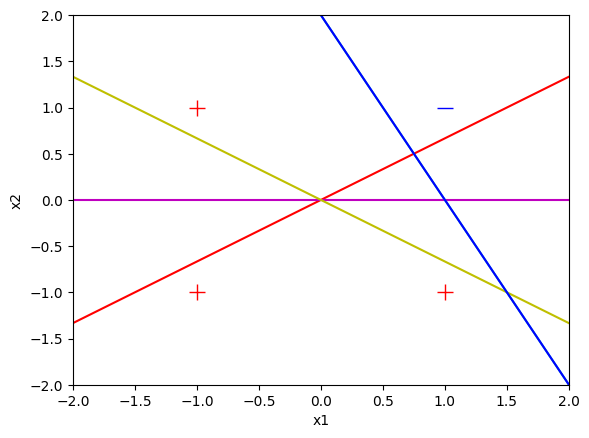

In [47]:
Optimal_Weights_AND= Perceptron_Algorithm(W_AND, X_train_and, y_train_and, 0.1)

In [48]:
Optimal_Weights_AND

array([-0.1 ,  0.1 ,  0.05])

In [49]:
W_NOR= [0.23, -0.1, 0.67]

In [50]:
color_list = ['r-', 'm-', 'y-', 'c-', 'b-', 'g-'] 


color_index = 0

w0 = -0.07 , w1 = -0.30 , w2 =  0.47
w0 = -0.17 , w1 = -0.40 , w2 =  0.27
w0 = -0.17 , w1 = -0.40 , w2 =  0.17
w0 = -0.17 , w1 = -0.40 , w2 =  0.07
w0 = -0.17 , w1 = -0.40 , w2 = -0.03
w0 = -0.07 , w1 = -0.40 , w2 = -0.03
w0 = -0.07 , w1 = -0.40 , w2 = -0.13
w0 =  0.03 , w1 = -0.40 , w2 = -0.13
w0 =  0.03 , w1 = -0.40 , w2 = -0.13
Learning Complete at epoch 9
Optimal Hyperplane Weighs Are [ 0.03 -0.4  -0.13]


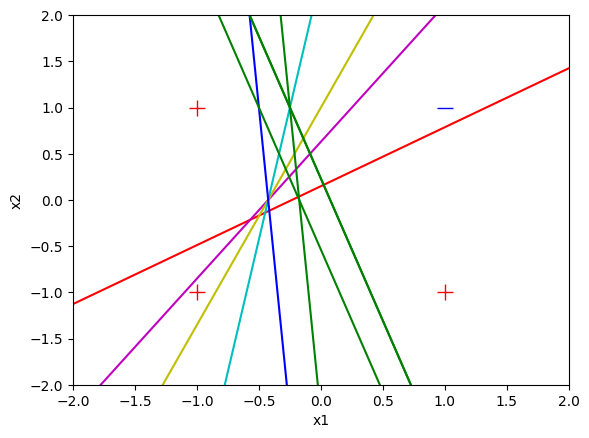

In [51]:
Optimal_Weights_NOR= Perceptron_Algorithm(W_NOR, X_train_nor, y_train_nor, lr=0.1) 

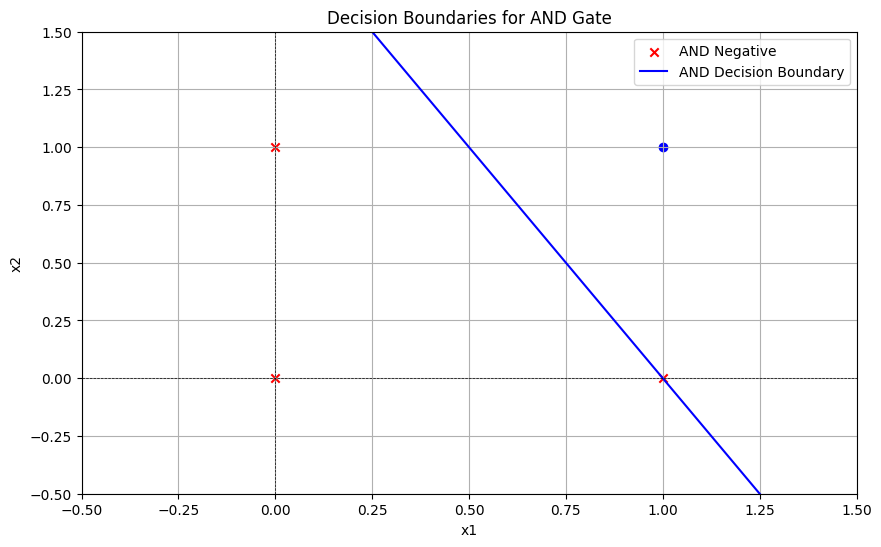

In [52]:
plt.figure(figsize=(10, 6))

# Plot data points for AND gate
for i, x in enumerate(X_train_and):
    if y_train_and[i] == 1:
        plt.scatter(x[1], x[2], color='blue', marker='o', label='AND Positive' if i == 0 else "")
    else:
        plt.scatter(x[1], x[2], color='red', marker='x', label='AND Negative' if i == 0 else "")

# Plot decision boundary for AND gate
x_vals = np.linspace(-0.5, 1.5, 100)
if abs(Optimal_Weights_AND[2]) > 1e-5:
    y_vals_and = -(Optimal_Weights_AND[1] / Optimal_Weights_AND[2]) * x_vals - (Optimal_Weights_AND[0] / Optimal_Weights_AND[2])
    plt.plot(x_vals, y_vals_and, label='AND Decision Boundary', color='blue')
plt.axhline(0, color='black',linewidth=0.5, linestyle='--')
plt.axvline(0, color='black',linewidth=0.5, linestyle='--')
plt.xlim(-0.5, 1.5)
plt.ylim(-0.5, 1.5)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Decision Boundaries for AND Gate')
plt.legend()
plt.grid()
plt.show()

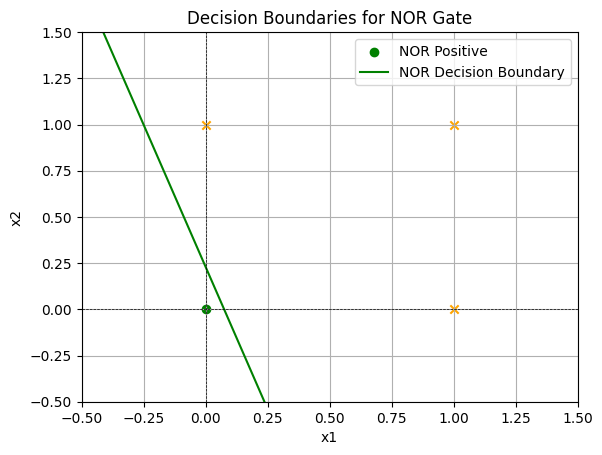

In [53]:

# Plot data points for NOR gate
for i, x in enumerate(X_train_nor):
    if y_train_nor[i] == 1:
        plt.scatter(x[1], x[2], color='green', marker='o', label='NOR Positive' if i == 0 else "")
    else:
        plt.scatter(x[1], x[2], color='orange', marker='x', label='NOR Negative' if i == 0 else "")

# Plot decision boundary for NOR gate
if abs(Optimal_Weights_NOR[2]) > 1e-5:
    y_vals_nor = -(Optimal_Weights_NOR[1] / Optimal_Weights_NOR[2]) * x_vals - (Optimal_Weights_NOR[0] / Optimal_Weights_NOR[2])
    plt.plot(x_vals, y_vals_nor, label='NOR Decision Boundary', color='green')

# Customize plot
plt.axhline(0, color='black',linewidth=0.5, linestyle='--')
plt.axvline(0, color='black',linewidth=0.5, linestyle='--')
plt.xlim(-0.5, 1.5)
plt.ylim(-0.5, 1.5)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Decision Boundaries for NOR Gate')
plt.legend()
plt.grid()
plt.show()